In [2]:
from os import listdir
from os.path import isfile, join
import typing
from typing import List
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.ion()

In [3]:
data_path = "data/data-simulation/e-coli-500-node/"
tsv_files = [f for f in listdir(data_path) if f.endswith(".tsv") and "noise" not in f]

In [4]:
tsv_files

['Ecoli-500-1_wildtype.tsv',
 'Ecoli-500-1_proteins_knockouts.tsv',
 'Ecoli-500-1_dream4_timeseries.tsv',
 'Ecoli-500-1_goldstandard.tsv',
 'Ecoli-500-1_proteins_dream4_timeseries.tsv',
 'Ecoli-500-1_goldstandard_signed.tsv',
 'Ecoli-500-1_proteins_knockdowns.tsv',
 'Ecoli-500-1_normalization_constant.tsv',
 'Ecoli-500-1_proteins_dualknockouts.tsv',
 'Ecoli-500-1_dualknockouts_indexes.tsv',
 'Ecoli-500-1_knockdowns.tsv',
 'Ecoli-500-1_multifactorial.tsv',
 'Ecoli-500-1_proteins_wildtype.tsv',
 'Ecoli-500-1_dualknockouts.tsv',
 'Ecoli-500-1_dualknockouts_perturbations.tsv',
 'Ecoli-500-1_knockouts.tsv',
 'Ecoli-500-1_multifactorial_perturbations.tsv',
 'Ecoli-500-1_proteins_multifactorial.tsv',
 'Ecoli-500-1_dream4_timeseries_perturbations.tsv']

In [5]:
all_dfs = [pd.read_csv(join(data_path, f), sep="\t") for f in tsv_files]

In [6]:
col_size = [df.shape[1] for df in all_dfs]
num_nodes = max(set(col_size), key=col_size.count) # take the mode as the most probable number of nodes

Weird things happening with dataframe shape.

In [7]:
[print(idx, n, df.shape) for (n, (idx, df)) in zip(tsv_files, enumerate(all_dfs)) if df.shape[1] != num_nodes]

2 Ecoli-500-1_dream4_timeseries.tsv (210, 501)
3 Ecoli-500-1_goldstandard.tsv (249499, 3)
4 Ecoli-500-1_proteins_dream4_timeseries.tsv (210, 501)
5 Ecoli-500-1_goldstandard_signed.tsv (835, 3)
7 Ecoli-500-1_normalization_constant.tsv (0, 1)
9 Ecoli-500-1_dualknockouts_indexes.tsv (104, 2)


[None, None, None, None, None, None]

In [8]:
all_dfs[2].head()

,Time,allS,allR,ybbW,allA,allD,allE,allB,glxK,hyi,...,frdC,nikE,moeA,frdB,dcuA,nikA,cydC,nikB,cydD,nikD
0,0,0.072651,0.721930,0.046473,0.015746,0.081733,0.012664,0.009114,0.010172,0.016605,...,0.193830,0.018304,0.498273,0.181664,0.110207,0.083310,0.412454,0.183343,0.642423,0.066620
1,50,0.053218,0.591898,0.017605,0.007820,0.142769,0.030078,0.005571,0.000861,0.029189,...,0.188816,0.016643,0.664268,0.146389,0.097142,0.092978,0.423825,0.030580,0.613945,0.036455
2,100,0.107256,0.704269,0.052539,0.003724,0.241703,0.026411,0.000336,0.000035,0.033919,...,0.153168,0.006274,0.624237,0.126872,0.142635,0.179924,0.353382,0.015212,0.557060,0.043732
3,150,0.151515,0.678541,0.030513,0.009971,0.238787,0.045030,0.001693,0.000858,0.035849,...,0.111021,0.009598,0.541334,0.101637,0.138584,0.240105,0.256883,0.008054,0.701070,0.070652
4,200,0.100932,0.721797,0.034870,0.016237,0.302869,0.039192,0.000016,0.000053,0.020141,...,0.154087,0.032936,0.516295,0.180629,0.125088,0.308727,0.236720,0.000270,0.582701,0.068070


So there is a time component. Might be fun for RNN models!?? But we should remove that column

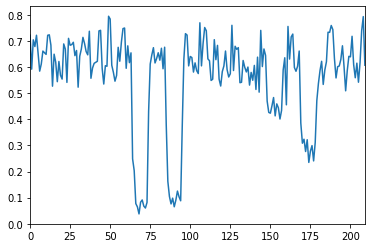

In [9]:
all_dfs[2]['allR'].plot()

In [10]:
from pandas import DataFrame

In [11]:
merged_df = all_dfs[0]

In [12]:
merged_df.shape

(1, 500)

In [13]:
for df in all_dfs[1:]:
    if df.shape[1] != 500:
        if df.shape[1] == 501:
            merged_df = merged_df.append(df.iloc[:,1:], sort=True)
        else:
            pass
    else:
        merged_df = merged_df.append(df, sort=True)

In [14]:
merged_df.head()

,acrA,acrB,acrD,adrA,ahpC,ahpF,alaS,allA,allB,allC,...,ynfE,ynfF,ynfG,ynfH,yoaG,yqjA,yrbL,ytfE,zinT,zwf
0,0.294664,0.092584,0.488607,0.174094,0.271341,0.378001,0.648849,0.005223,0.020562,0.012033,...,0.084998,0.050667,0.109524,0.107323,0.354529,0.670635,0.693253,0.333190,0.524343,0.191915
0,0.264658,0.058048,0.470147,0.296536,0.295839,0.323439,0.622076,0.016143,0.023722,0.008969,...,0.068630,0.016361,0.146048,0.056404,0.370408,0.676422,0.619028,0.402391,0.677500,0.137000
1,0.331810,0.071026,0.472651,0.179991,0.384327,0.395325,0.596240,0.691944,0.684229,0.454941,...,0.172619,0.011175,0.110215,0.118315,0.345721,0.564084,0.680821,0.413307,0.568779,0.180200
2,0.335241,0.141966,0.392059,0.187554,0.375568,0.370825,0.597947,0.023230,0.036065,0.005655,...,0.099305,0.050536,0.222056,0.096309,0.417925,0.707691,0.552163,0.384903,0.610966,0.210638
3,0.361994,0.153502,0.446023,0.177590,0.293448,0.436567,0.748479,0.000000,0.014571,0.006275,...,0.093587,0.056580,0.167252,0.105229,0.392862,0.725482,0.623140,0.438423,0.604094,0.135744


In [15]:
merged_df.shape

(4244, 500)

Let's have a look at the joined data:

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
transformed_data = pca.fit_transform(merged_df)

In [24]:
transformed_data[:,0]

array([-1.44832089, -1.36241293, -1.58350836, ...,  7.34625277,
        7.19293855,  7.57571385])

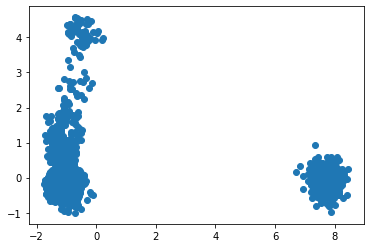

In [25]:
plt.scatter(x = transformed_data[:,0], y = transformed_data[:,1])

In [14]:
save_path = join(data_path, "merged.csv")

In [15]:
merged_df.to_csv(save_path)